In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

from pandas.plotting import lag_plot

In [ ]:
def parser(x):
	return datetime.strptime(x, '%Y-%m')

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/ML/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=False, date_parser=parser)

dataset.head()

# Output berbentuk Series, bukan DataFrame (karena nilai squeeze=True)

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [ ]:
dataset.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


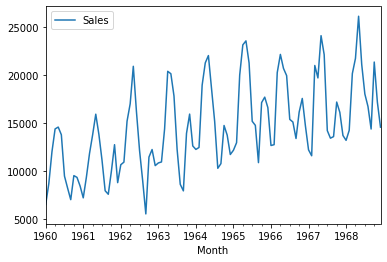

In [ ]:
dataset.plot()
plt.show()

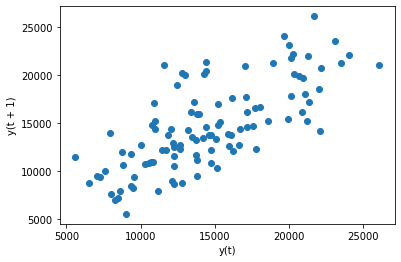

In [ ]:
lag_plot(dataset)
plt.show()

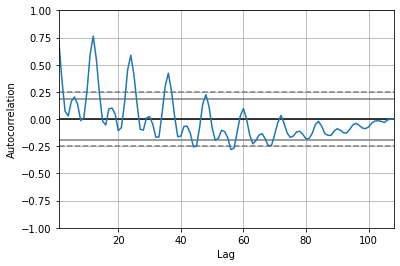

In [ ]:
pd.plotting.autocorrelation_plot(dataset)
plt.show()

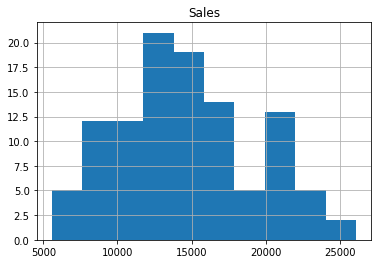

In [ ]:
dataset.hist()
plt.show()

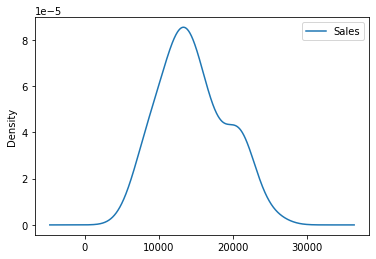

In [ ]:
dataset.plot(kind='kde') 
plt.show()

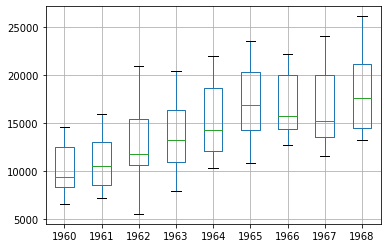

In [ ]:
groups = dataset.groupby(pd.Grouper(freq='A'))
print(groups) 
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values.flatten()
years.boxplot()
plt.show()

In [ ]:
values = dataset.values
values = values.astype('float32')

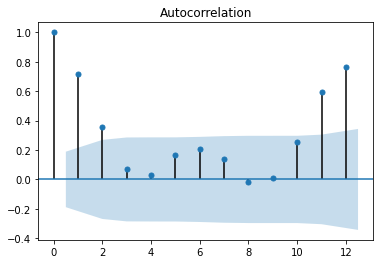

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dataset, lags=12, ax=plt.gca())
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
train_size = int(len(values) * 0.50)
train, test = values[0:train_size], values[train_size:]

In [ ]:
values = dataset.values
train, test = values[:len(values)-12], values[len(values)-12:]

print(len(values))
print(values)
print(len(values[1:len(values)-12]))
print(len(values[len(values)-12:]))

108
[[ 6550]
 [ 8728]
 [12026]
 [14395]
 [14587]
 [13791]
 [ 9498]
 [ 8251]
 [ 7049]
 [ 9545]
 [ 9364]
 [ 8456]
 [ 7237]
 [ 9374]
 [11837]
 [13784]
 [15926]
 [13821]
 [11143]
 [ 7975]
 [ 7610]
 [10015]
 [12759]
 [ 8816]
 [10677]
 [10947]
 [15200]
 [17010]
 [20900]
 [16205]
 [12143]
 [ 8997]
 [ 5568]
 [11474]
 [12256]
 [10583]
 [10862]
 [10965]
 [14405]
 [20379]
 [20128]
 [17816]
 [12268]
 [ 8642]
 [ 7962]
 [13932]
 [15936]
 [12628]
 [12267]
 [12470]
 [18944]
 [21259]
 [22015]
 [18581]
 [15175]
 [10306]
 [10792]
 [14752]
 [13754]
 [11738]
 [12181]
 [12965]
 [19990]
 [23125]
 [23541]
 [21247]
 [15189]
 [14767]
 [10895]
 [17130]
 [17697]
 [16611]
 [12674]
 [12760]
 [20249]
 [22135]
 [20677]
 [19933]
 [15388]
 [15113]
 [13401]
 [16135]
 [17562]
 [14720]
 [12225]
 [11608]
 [20985]
 [19692]
 [24081]
 [22114]
 [14220]
 [13434]
 [13598]
 [17187]
 [16119]
 [13713]
 [13210]
 [14251]
 [20139]
 [21725]
 [26099]
 [21084]
 [18024]
 [16722]
 [14385]
 [21342]
 [17180]
 [14577]]
95
12


In [ ]:
model = AR(train)
model_fit = model.fit()
print('Lag:', model_fit.k_ar)
print('Coefficients:', model_fit.params)

Lag: 12
Coefficients: [ 2.68298809e+03  2.12468551e-01  7.14078750e-02 -9.84501076e-02
 -8.42436210e-02  1.26038708e-01 -6.13991473e-02  3.92673806e-02
 -9.43735407e-02 -1.11434223e-02 -5.86486822e-02  2.70241371e-01
  5.49229320e-01]


In [ ]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 
for i in range(len(predictions)):
  print('predicted=%f, expected=%f' % (predictions[i], test[i])) 
  rmse = sqrt(mean_squared_error(test, predictions))

print('Test RMSE: %.3f' % rmse)

predicted=11726.955280, expected=13210.000000
predicted=13102.659492, expected=14251.000000
predicted=19301.592602, expected=20139.000000
predicted=21520.034099, expected=21725.000000
predicted=24704.421821, expected=26099.000000
predicted=21160.652847, expected=21084.000000
predicted=15598.486334, expected=18024.000000
predicted=13923.205818, expected=16722.000000
predicted=14540.567411, expected=14385.000000
predicted=17622.782731, expected=21342.000000
predicted=16679.547194, expected=17180.000000
predicted=14203.884870, expected=14577.000000
Test RMSE: 1687.575


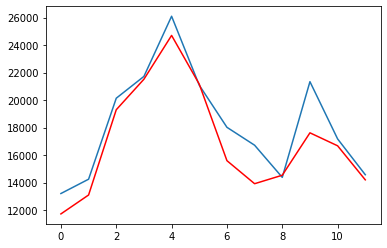

In [ ]:
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
model = ARIMA(dataset, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  108
Model:                     ARMA(2, 2)   Log Likelihood               -1008.379
Method:                       css-mle   S.D. of innovations           2725.661
Date:                Fri, 18 Sep 2020   AIC                           2028.758
Time:                        00:24:37   BIC                           2044.851
Sample:                    01-01-1960   HQIC                          2035.283
                         - 12-01-1968                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.446e+04    722.266     20.025      0.000     1.3e+04    1.59e+04
ar.L1.Sales     0.6718      0.226      2.966      0.004       0.228       1.116
ar.L2.Sales    -0.3356      0.172     -1.954    

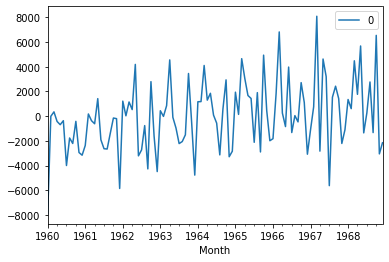

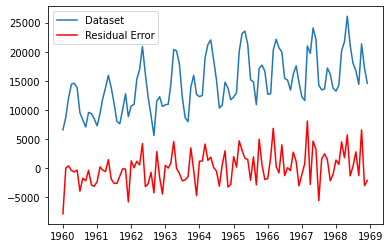

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

plt.plot(dataset)
plt.plot(residuals,  color='red')
plt.legend(['Dataset','Residual Error'])

In [ ]:
residuals

,0
Month,
1960-01-01,-7913.475798
1960-02-01,-12.180111
1960-03-01,346.113876
1960-04-01,-432.010910
1960-05-01,-691.925377
...,...
1968-08-01,2764.946231
1968-09-01,-1331.757363
1968-10-01,6537.167840


In [ ]:
print(residuals.describe())

                 0
count   108.000000
mean      1.881608
std    2806.218285
min   -7913.475798
25%   -2007.021605
50%     -57.544001
75%    1457.131984
max    8085.223199


In [ ]:
values = dataset.values
size = int(len(values) * 0.50)
train, test = values[0:size], values[size:len(values)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(2,0,2))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	prediction = output[0]
	predictions.append(prediction)
	expected = test[t]
	history.append(expected)
	print('predicted=%f, expected=%f' % (prediction, expected))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

predicted=14711.336373, expected=15175.000000
predicted=12660.419268, expected=10306.000000
predicted=9041.604163, expected=10792.000000
predicted=11103.457995, expected=14752.000000
predicted=16901.918514, expected=13754.000000
predicted=13870.400524, expected=11738.000000
predicted=9381.646945, expected=12181.000000
predicted=11980.868369, expected=12965.000000
predicted=14322.951194, expected=19990.000000
predicted=19771.359712, expected=23125.000000
predicted=21223.069789, expected=23541.000000
predicted=18812.346408, expected=21247.000000
predicted=16566.724304, expected=15189.000000
predicted=11664.222633, expected=14767.000000
predicted=13344.855198, expected=10895.000000
predicted=11501.958984, expected=17130.000000
predicted=17057.543914, expected=17697.000000
predicted=18545.785376, expected=16611.000000
predicted=13775.538690, expected=12674.000000
predicted=9818.129010, expected=12760.000000
predicted=13115.143741, expected=20249.000000
predicted=22750.001882, expected=2213

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=18631.605321, expected=24081.000000
predicted=16263.518492, expected=22114.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=21713.245096, expected=14220.000000
predicted=11199.597956, expected=13434.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=14457.421424, expected=13598.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=14305.796049, expected=17187.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=18349.140576, expected=16119.000000
predicted=14842.201445, expected=13713.000000
predicted=11818.350634, expected=13210.000000
predicted=13378.745635, expected=14251.000000
predicted=15395.402079, expected=20139.000000
predicted=20077.871438, expected=21725.000000
predicted=20180.286643, expected=26099.000000
predicted=22677.838027, expected=21084.000000
predicted=17538.210331, expected=18024.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=17990.292482, expected=16722.000000
predicted=15741.563113, expected=14385.000000
predicted=14586.112716, expected=21342.000000
predicted=20463.025565, expected=17180.000000
predicted=16895.904298, expected=14577.000000
Test RMSE: 3374.813


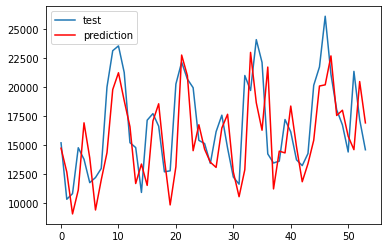

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings

p_values = range(0, 8)
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=24110004.881
ARIMA(0, 0, 1) MSE=13607908.837
ARIMA(0, 1, 0) MSE=13300371.177
ARIMA(0, 1, 1) MSE=13589621.734
ARIMA(1, 0, 0) MSE=11557177.876
ARIMA(1, 0, 1) MSE=11353145.714
ARIMA(1, 1, 0) MSE=13558917.487
ARIMA(2, 0, 0) MSE=11429525.777
ARIMA(2, 1, 0) MSE=13793456.475
ARIMA(3, 0, 0) MSE=11550826.789
ARIMA(3, 1, 0) MSE=11694089.817
ARIMA(4, 0, 0) MSE=10757368.973
ARIMA(4, 1, 0) MSE=10657861.783
ARIMA(5, 0, 0) MSE=10269949.210
ARIMA(5, 1, 0) MSE=10256667.318
ARIMA(6, 0, 0) MSE=9603075.484
ARIMA(6, 1, 0) MSE=10316632.550
ARIMA(7, 0, 0) MSE=10051514.212
ARIMA(7, 1, 0) MSE=11097816.316
Best ARIMA(6, 0, 0) MSE=9603075.484


In [ ]:
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [ ]:
if __name__ == '__main__':
	# define dataset
	data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
	print(data)
	# data split
	n_test = 4
	# model configs
	cfg_list = sarima_configs()
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
done


In [ ]:
n_test = 2

# model configs
cfg_list = sarima_configs()

# grid search
scores = grid_search(dataset.values, cfg_list, n_test)
print('done')

# list top 3 configs
for cfg_list, error in scores[:3]:
  print(cfg_list, error)

done
